# Lista 1 
## Obliczenia naukowe
**Patryk Majewski, 250134**

## Zadanie 1
Celem zadania było wyznaczenie w sposób iteracyjny niektórych wartości charakteryzujących arytmetykę.
### Epsilon maszynowy
Pierwszą z nich był **macheps**, czyli najmniejsza taka liczba $\epsilon$, że $ 1 + \epsilon > 1 $. Epsilon jest zatem odległością od 1 do najmniejszej liczby większej od 1 możliwej do zapisania w danej arytmetyce. Liczba 1 ma w zapisie dwójkowym mantysę wypełnioną zerami:

In [1]:
bitstring(Float16(1.0))

"0011110000000000"

dlatego spodziewać się można, że $1+\epsilon$ różni się od niej jej najmłodszym bitem. Sprawdzanie epsilonów rozpoczniemy od wartości 1, a kolejne konstruować będziemy dzieląc przez 2, co w zapisie dwójkowym odpowiada przesuwaniu jedynej jedynki w mantysie coraz bardziej w prawo. Posłużymy się zatem następującą procedurą:

In [2]:
function find_eps(type)
    epsilon = type(1.0)
    while type(1.0 + 0.5*epsilon) > type(1.0)
        epsilon = type(0.5 * epsilon)
    end
    return epsilon
end

find_eps (generic function with 1 method)

gdzie argument **type** określa arytmetykę, dla której określić mamy $\epsilon$. Otrzymane wyniki porównamy z tymi, które zwraca biblioteczna funkcja **eps**:

In [3]:
for t in [Float16, Float32, Float64]
    println(t)
    println(rpad("iteracyjnie: ", 15), find_eps(t))
    println(rpad("funkcja eps: ", 15), eps(t), '\n')
end

Float16
iteracyjnie:   0.000977
funkcja eps:   0.000977

Float32
iteracyjnie:   1.1920929e-7
funkcja eps:   1.1920929e-7

Float64
iteracyjnie:   2.220446049250313e-16
funkcja eps:   2.220446049250313e-16



Wyniki otrzymane iteracyjnie pokrywają się z tymi zwracanymi przez wywołanie **eps**. Porównamy je również z tymi, które określone są w pliku nagłówkowym **float.h** języka C. Skorzystamy z prostego programu odczytującego wartości stałych FLT_EPSILON (odpowiednik Float32), DBL_EPSILON (odpowiednik Float64) oraz LDBL_EPSILON. Typ Float16 nie ma tu swojego odpowiednika.

FLT_EPSILON = 1.19209e-07  
DBL_EPSILON = 2.22045e-16  
LDBL_EPSILON = 1.0842e-19

Jak widać, odpowiadające sobie typy mają bardzo zbliżone wartości epsilona maszynowego.
***

Sprawdzimy teraz związek epsilona maszynowego z precyzją. Precyzją arytmetyki (również oznaczaną jako $\epsilon$) nazywamy liczbę wyrażoną wzorem

$$ \epsilon = \frac{1}{2}\beta^{1-t} $$

gdzie $\beta$ jest bazą rozwinięcia (w naszym przypadku 2), a $t$ oznacza liczbę cyfr mantysy znormalizowanej do przedziału $[1/\beta,1)$. Dla typów Float16, Float32 i Float64 precyzje arytmetyki wynoszą więc:

Float16: $ 2^{-1}\cdot 2^{1-10} = 2^{-10} $  
Float32: $ 2^{-1}\cdot 2^{1-23} = 2^{-23} $  
Float64: $ 2^{-1}\cdot 2^{1-52} = 2^{-52} $

Sprawdźmy teraz wartości wyznaczonych precyzji z dokładnością do odpowiadających im typów: 

In [4]:
println("Float16: ", Float16(2^-10))
println("Float32: ", Float32(2^-23))
println("Float64: ", Float64(2^-52))

Float16: 0.000977
Float32: 1.1920929e-7
Float64: 2.220446049250313e-16


Otrzymane wartości precyzji pokrywają się z wcześniej wyznaczonymi epsilonami maszynowymi, zatem możemy wnioskować, że dla danej arytmetyki macheps jest równy jej precyzji. 

### Liczba eta
Kolejną wartością do ustalenia była **liczba eta**, czyli najmniejsza $\eta$ taka, że $\eta > 0$. Intuicja jest podobna jak w przypadku epsilona (mantysa liczby 0 wypełniona jest zerami), zatem zastosowana metoda jest zupełnie analogiczna:

In [5]:
function find_eta(type)
    eta = type(1.0)
    while type(0.5*eta) > 0
        eta = type(0.5*eta)
    end
    return eta
end

find_eta (generic function with 1 method)

Podobnie jak w przypadku epsilona, uzyskane wartości porównamy z wywołaniami funkcji bibliotecznych:

In [6]:
for t in [Float16, Float32, Float64]
    println(t)
    println(rpad("iteracyjnie: ", 15), find_eta(t))
    println(rpad("nextfloat(0): ", 15), nextfloat(t(0.0)), '\n')
end

Float16
iteracyjnie:   6.0e-8
nextfloat(0):  6.0e-8

Float32
iteracyjnie:   1.0e-45
nextfloat(0):  1.0e-45

Float64
iteracyjnie:   5.0e-324
nextfloat(0):  5.0e-324



Również w tym przypadku wyniki są zbieżne.
***
Sprawdzimy związek liczby eta z MIN$_{sub}$. Jest ona najmniejszą dla arytmetyki liczbą w postaci nieznormalizowanej, to znaczy taką, że przedstawienie jej w postaci znormalizowanej wymagałoby użycia wykładnika mniejszego niż jest to dopuszczalne. Oblicza się ją następująco:

$$ \mathrm{MIN}_{sub} = 2^{1-t}\cdot2^{c_{min}} $$

gdzie $t$ jest liczbą cyfr mantysy (z przedziału $[1,2)$), a $c_{min}$ minimalną możliwą do zapisania cechą wyznaczaną ze wzoru

$$ c_{min} = -2^{d-1}+2 $$

w którym $d$ oznacza liczbę bitów przeznaczonych na zapis cechy. Dla typów języka Julia mamy zatem:

Float16:  
$c_{min} = -2^{5-1}+2 = -14$  
MIN$_{sub} = 2^{-10}\cdot2^{-14} = 2^{-24} $

Float32:  
$c_{min} = -2^{8-1}+2 = -126$  
MIN$_{sub} = 2^{-23}\cdot2^{-126} = 2^{-149} $

Float64:  
$c_{min} = -2^{11-1}+2 = -1022$  
MIN$_{sub} = 2^{-52}\cdot2^{-1022} = 2^{-1074} $

In [7]:
println("Float16: ", Float16(2^-24))
println("Float32: ", Float32(2^-149))
println("Float64: ", Float64(2^-1074))

Float16: 6.0e-8
Float32: 1.0e-45
Float64: 5.0e-324


Obliczone wartości pokrywają się z poprzednimi, co sugeruje, że MIN$_{sub}$ danej arytmetyki jest równy jej liczbie eta.
***
Sprawdzimy teraz, czy te same wartości zwróci funkcja **floatmin**:

In [8]:
for t in [Float16, Float32, Float64]
    println("$t: ", floatmin(t))
end

Float16: 6.104e-5
Float32: 1.1754944e-38
Float64: 2.2250738585072014e-308


Możemy zauważyć, że otrzymane wyniki są zdecydowanie większe od poprzednich. Ponadto

In [9]:
bitstring(floatmin(Float16))

"0000010000000000"

co pozwala przypuszczać, że wartości te mają formę znormalizowaną. Sprawdzimy ich związek z MIN$_{nor}$, czyli najmniejszą możliwą do zapisania liczbą w postaci znormalizowanej, wyznaczaną ze wzoru

$$\mathrm{MIN}_{nor} = 2^{c_{min}}$$

gdzie $c_{min}$ obliczane jest tak samo jak dla MIN$_{sub}$. Mamy zatem:

Float16:  
MIN$_{nor} = 2^{-14} $

Float32:  
MIN$_{nor} = 2^{-126} $

Float64:  
MIN$_{nor} = 2^{-1022} $

In [10]:
println("Float16: ", Float16(2^-14))
println("Float32: ", Float32(2^-126))
println("Float64: ", Float64(2^-1022))

Float16: 6.104e-5
Float32: 1.1754944e-38
Float64: 2.2250738585072014e-308


Wartości zwracane przez **floatmin** dla danej arytmetyki równe są zatem jej MIN$_{nor}$.

### Największa liczba możliwa do wyrażenia
Ostatnią poszukiwaną wartością była **MAX**, czyli największa możliwa do wyrażenia liczba dla danej arytmetyki. Intuicja podpowiada, że będzie to liczba, której cecha ma maksymalną dopuszczalną wartość, a mantysa składa się z samych jedynek. Celem wygenerowania pierwszej takiej liczby posłużymy się funkcją **prevfloat(1)**:

In [11]:
bitstring(prevfloat(Float16(1.0)))

"0011101111111111"

Kolejne liczby konstruować będziemy mnożąc przez 2 (zasadniczo inkrementując cechę). Posłużymy się więc następującą procedurą:

In [12]:
function find_max(type)
    max = prevfloat(type(1.0))
    while !isinf(2*max)
        max *= 2
    end
    return max
end

find_max (generic function with 1 method)

Za pomocą funkcji **isinf** sprawdzamy, czy kolejna inkrementacja nie spowoduje utworzenia liczby spoza dostępnego zakresu. Bibliotecznym odpowiednikiem utworzonej funkcji jest **floatmax**:

In [13]:
for t in [Float16, Float32, Float64]
    println(t)
    println(rpad("iteracyjnie: ", 15), find_max(t))
    println(rpad("floatmax: ", 15), floatmax(t), '\n')
end

Float16
iteracyjnie:   6.55e4
floatmax:      6.55e4

Float32
iteracyjnie:   3.4028235e38
floatmax:      3.4028235e38

Float64
iteracyjnie:   1.7976931348623157e308
floatmax:      1.7976931348623157e308



Wyniki są zatem zgodne ze stanem faktycznym. Sprawdzimy jeszcze, jakie wartości maksymalne dla typów float (Float32 w Julii), double (Float64) i long double zostały określone w pliku nagłówkowym **float.h** języka C:  

FLT_MAX = 3.40282e+38  
DBL_MAX = 1.79769e+308  
LDBL_MAX = 1.18973e+4932

Podobnie jak w przypadku epsilona, wartości z pliku **float.h** są bardzo zbliżone do tych, które uzyskaliśmy w Julii.

### Wnioski
Reprezentacja określona standardem IEEE-754 ma pewne ograniczenia w zakresie dokładnego wyrażania liczb zmiennoprzecinkowych. Ich efekty są mniej widoczne wraz ze wzrostem liczby bitów przeznaczonych na zapis liczby - zmniejsza się najmniejsza możliwa do wyrażenia liczba dodatnia ($\eta$) i najmniejsza liczba większa od 1 ($1+\epsilon$), a także znacząco rośnie największa liczba możliwa do wyrażenia.

## Zadanie 2
Celem zadania było eksperymentalne sprawdzenie prawidłowości wzoru Kahana na epsilon maszynowy:

$$ 3\cdot\left(\frac{4}{3}-1\right)-1 $$

Porównamy zatem wyniki dla różnych arytmetyk z wartościami zwracanymi przez funkcję **eps**:

In [14]:
function kahan_eps(type)
    type(3.0) * (type(4.0/3.0) - type(1.0)) - type(1.0)
end

for t in [Float16, Float32, Float64]
    println(t)
    println(rpad("kahan_eps: ", 15), kahan_eps(t))
    println(rpad("eps: ", 15), eps(t), '\n')
end

Float16
kahan_eps:     -0.000977
eps:           0.000977

Float32
kahan_eps:     1.1920929e-7
eps:           1.1920929e-7

Float64
kahan_eps:     -2.220446049250313e-16
eps:           2.220446049250313e-16



Jak widać, wyniki dla trzech sprawdzanych arytmetyk okazały się poprawne co do wartości bezwzględnej.

## Zadanie 3
Sprawdzimy eksperymentalnie, że w arytmetyce Float64 liczby z przedziału $[1,2]$ są równomiernie rozmieszczone z krokiem $ \delta = 2^{-52} $. Ponieważ sprawdzenie wszystkich dostępnych liczb jest dosyć kosztowne, sprawdzimy wartości wokół końców przedziału:

In [15]:
# argument func oznacza funkcję kontrolną - podającą prawdziwą wartość kolejnej liczby
# przy sprawdzaniu początku przedziału podajemy nextfloat i dodatnią deltę
# przy końcu przedziału - prevfloat i deltę ujemną
function check_values(start, delta, func)
    real = start
    for i in 1:100
        start += delta
        real = func(real)
        if start != real
            return false
        end
    end
    return true
end

delta = 2.0^-52
if (check_values(1.0, delta, nextfloat) && check_values(2.0, -delta, prevfloat))
    println("Sukces! Liczby są rozmieszczone z krokiem δ.")
else
    println("Liczby nie są równomiernie rozmieszczone z krokiem δ.")
end

Sukces! Liczby są rozmieszczone z krokiem δ.


Sprawdźmy, czy ten sam rozmiar kroku dzieli 1 i poprzedzającą ją liczbę:

In [16]:
1.0 - delta == prevfloat(1.0)

false

In [17]:
println(bitstring(prevfloat(1.0)))
println(bitstring(1.0))
println(bitstring(nextfloat(1.0)))

0011111111101111111111111111111111111111111111111111111111111111
0011111111110000000000000000000000000000000000000000000000000000
0011111111110000000000000000000000000000000000000000000000000001


Dwójkowe zapisy tych liczb pozwalają nam poznać przyczynę takiego stanu rzeczy. Krok pomiędzy kolejnymi liczbami zależny jest od ich cechy, to znaczy

$$ \delta = 2^{cecha - 2^{d-1} + 1} \cdot 2^{1-t} $$

gdzie $cecha$ odnosi się do mniejszej z dwóch kolejnych liczb, $d$ to liczba cyfr cechy, a $t$ - liczba cyfr mantysy z $[1,2)$, czyli dla arytmetyki Float64:

$$ \delta = 2^{cecha - 1023} \cdot 2^{-52} $$

Dla przedziału $[1/2,1]$ mamy zatem:

In [18]:
# odczyt cechy z zapisu dwójkowego:
exponent = parse(Int, bitstring(0.5)[2:12], base=2) 

real_exp = exponent - 1023 - 52
delta = 2.0^real_exp

if (check_values(0.5, delta, nextfloat) && check_values(1.0, -delta, prevfloat))
    println("δ = $delta = 2^$real_exp")
end

δ = 1.1102230246251565e-16 = 2^-53


Analogicznie postępujemy dla przedziału $[2,4]$:

In [19]:
exponent = parse(Int, bitstring(2.0)[2:12], base=2)
real_exp = exponent - 1023 - 52
delta = 2.0^real_exp

if (check_values(2.0, delta, nextfloat) && check_values(4.0, -delta, prevfloat))
    println("δ = $delta = 2^$real_exp")
end

δ = 4.440892098500626e-16 = 2^-51


W obu tych przedziałach dodanie odpowiadającej im delty skutkuje inkrementacją mantysy, zatem podobnie jak dla $[1,2]$, również w nich każdą liczbę można przedstawić jako

$$ a + k\delta $$

gdzie $a$ jest początkiem przedziału, $\delta$ krokiem odpowiadającym danemu przedziałowi, a $k = 0,1,2,...,2^{52}$, na przykład

In [20]:
2.0 + (2^52-1) * delta == prevfloat(4.0)

true

### Wnioski
Liczby w przedziałach pomiędzy kolejnymi potęgami liczby 2 rozmieszczone są równomiernie. Co więcej, z uwagi na skończoną liczbę możliwych do zapisania mantys, każdy taki przedział zawiera dokładnie tyle samo liczb. Odległości pomiędzy kolejnymi potęgami dwójki rosną, musi też zatem rosnąć krok $\delta$ na przedziałach między nimi.

## Zadanie 4
Należy wyznaczyć najmniejszą liczbę $x \in (1,2)$ typu Float64, taką że $x \cdot \frac{1}{x} \ne 1$. Będziemy zatem sprawdzać kolejne liczby od 1 do momentu spełnienia warunku:

In [21]:
cur = 1.0
while nextfloat(cur) * (1.0/nextfloat(cur)) == 1.0
    cur = nextfloat(cur)
end
println("Najmniejsza taka liczba to $cur")

Najmniejsza taka liczba to 1.0000000572289969


### Wnioski
Z powodu ograniczeń dokładności w arytmetyce zmiennopozycyjnej mogą nie zostać zachowane wszystkie tożsamości algebraiczne.

## Zadanie 5
Celem zadania jest zaimplementowanie czterech strategii obliczania iloczynu skalarnego dwóch wektorów $x$ i $y$, a następnie porównanie wyników ich działania.  
Pierwszy - "naprzód", to znaczy $\sum_{i=1}^n x[i]\cdot y[i]$:

In [22]:
function forward(x, y, type)
    sum = type(0.0)
    for i in 1:length(x)
        sum += x[i] * y[i]
    end 
    return sum
end

forward (generic function with 1 method)

Drugi - "wstecz", to znaczy $\sum_{i=n}^1 x[i]\cdot y[i]$:

In [23]:
function backward(x, y, type)
    sum = type(0.0)
    for i in length(x):-1:1
        sum += x[i] * y[i]
    end 
    return sum
end

backward (generic function with 1 method)

Trzeci - mnożymy wartości o odpowiadających indeksach, a następnie tworzymy sumy częściowe wyników dodatnich (dodawanych w kolejności malejącej) i ujemnych (dodawanych w kolejności rosnącej). Na koniec dodajemy obie sumy.

In [24]:
function partial_desc(x, y)
    p = x .* y
    sum_pos = sum(sort(filter(a -> a>0, p), rev=true))
    sum_neg = sum(sort(filter(a -> a<0, p)))
    return sum_pos+sum_neg
end

partial_desc (generic function with 1 method)

Czwarty - analogiczny do trzeciego, ale sumy częściowe tworzone są w odwrotnym porządku:

In [25]:
function partial_asc(x, y)
    p = x .* y
    sum_pos = sum(sort(filter(a -> a>0, p)))
    sum_neg = sum(sort(filter(a -> a<0, p), rev=true))
    return sum_pos+sum_neg
end

partial_asc (generic function with 1 method)

Wywołamy teraz każdą z procedur dla dwóch wektorów określonych w zadaniu i porównamy ich wyniki z faktyczną wartością iloczynu skalarnego, czyli $−1.00657107000000 \cdot 10^{−11}$.

In [26]:
x = [2.718281828, -3.141592654, 1.414213562, 0.5772156649, 0.3010299957]
y = [1486.2497, 878366.9879, -22.37492, 4773714.647, 0.000185049]

for t in [Float32, Float64]
    a = Array{t,1}(x)
    b = Array{t,1}(y)
    println(t)
    println(rpad("real: ", 15), "-1.00657107000000e-11")
    println(rpad("forward: ", 15), forward(a, b, t))
    println(rpad("backward: ", 15), backward(a, b, t))
    println(rpad("partial_desc: ", 15), partial_desc(a, b))
    println(rpad("partial_asc: ", 15), partial_asc(a, b), '\n')
end

Float32
real:          -1.00657107000000e-11
forward:       -0.4999443
backward:      -0.4543457
partial_desc:  -0.5
partial_asc:   -0.5

Float64
real:          -1.00657107000000e-11
forward:       1.0251881368296672e-10
backward:      -1.5643308870494366e-10
partial_desc:  0.0
partial_asc:   0.0



Jak widać, nie uzyskaliśmy poprawnego wyniku żadną z zaimplementowanych metod. Szczególnie duże błędy otrzymaliśmy w arytmetyce Float32.

### Wnioski
Na błędy obliczeniowe ma wpływ nie tylko arytmetyka, ale również kolejność wykonywania działań.

## Zadanie 6
Przeanalizujemy wartości funkcji określonych wzorami  
$$ f(x) = \sqrt{x^2+1}-1 $$  
$$ g(x) = x^2/(\sqrt{x^2+1}+1) $$  
dla $x = 8^{-k}$, gdzie $k = 1, 2, 3, \dotso$

In [27]:
function f(x)
    sqrt(x^2 + 1.) - 1.
end

function g(x)
    x^2 / (sqrt(x^2 + 1.) + 1.)
end

println(rpad("x", 10), rpad("f(x)", 30), rpad("g(x)", 30))
println("-"^70)
for i in 1:15
    println(rpad("8^-$i", 10), rpad(f(8.0^-i), 30), rpad(g(8.0^-i), 30))
end

x         f(x)                          g(x)                          
----------------------------------------------------------------------
8^-1      0.0077822185373186414         0.0077822185373187065         
8^-2      0.00012206286282867573        0.00012206286282875901        
8^-3      1.9073468138230965e-6         1.907346813826566e-6          
8^-4      2.9802321943606103e-8         2.9802321943606116e-8         
8^-5      4.656612873077393e-10         4.6566128719931904e-10        
8^-6      7.275957614183426e-12         7.275957614156956e-12         
8^-7      1.1368683772161603e-13        1.1368683772160957e-13        
8^-8      1.7763568394002505e-15        1.7763568394002489e-15        
8^-9      0.0                           2.7755575615628914e-17        
8^-10     0.0                           4.336808689942018e-19         
8^-11     0.0                           6.776263578034403e-21         
8^-12     0.0                           1.0587911840678754e-22        
8^-13 

Mimo faktycznej równości obu funkcji, $g$ oferuje dokładniejsze wyniki. Dzieje się tak, ponieważ dla bardzo małych $x$ mamy $\sqrt{x^2 + 1} \approx 1$. Odejmowanie liczb o zbliżonej wartości w funkcji $f$ powoduje spadek dokładności związany z utratą liczb znaczących - stąd pojawiające się zera. 

### Wnioski
Przekształcenia algebraiczne pozwalające ominąć odejmowanie liczb o zbliżonej wartości umożliwiają redukcję błędów w obliczeniach.

## Zadanie 7
Skorzystamy z przybliżonego wzoru na pochodną funkcji  
$$ f'(x) \approx \tilde{f}(x) = \frac{f(x+h)-f(x)}{h} $$  
do obliczenia w przybliżeniu wartości pochodnej funkcji $f(x) = sin(x) + cos(3x)$, a następnie porównamy uzyskane wyniki z dokładnymi.

In [28]:
function derivative(f, h, x=1)
    (f(x+h)-f(x))/h
end

derivative (generic function with 2 methods)

Dokładny wzór na pochodną funkcji $f$ to $f'(x) = cos(x) - 3sin(3x)$, mamy zatem:

In [29]:
f(x) = sin(x) + cos(3x)
df(x) = cos(x) - 3sin(3x)

exact_df = df(1)

0.11694228168853815

Przyjrzyjmy się wartościom $\tilde{f}$ oraz błędów $|\tilde{f}(1) - f'(1)|$ dla $h=2^{-k}$, $k=0,1,2,...,54$:

In [30]:
println(rpad("h", 10), rpad("f_tilde", 30), rpad("|f_tilde - f'|", 30))
println("-"^70)
for i in 1:54
    f_tilde = derivative(f,2.0^-i)
    println(rpad("2^-$i", 10), rpad(f_tilde, 30), rpad(abs(f_tilde - exact_df), 30))
end

h         f_tilde                       |f_tilde - f'|                
----------------------------------------------------------------------
2^-1      1.8704413979316472            1.753499116243109             
2^-2      1.1077870952342974            0.9908448135457593            
2^-3      0.6232412792975817            0.5062989976090435            
2^-4      0.3704000662035192            0.253457784514981             
2^-5      0.24344307439754687           0.1265007927090087            
2^-6      0.18009756330732785           0.0631552816187897            
2^-7      0.1484913953710958            0.03154911368255764           
2^-8      0.1327091142805159            0.015766832591977753          
2^-9      0.1248236929407085            0.007881411252170345          
2^-10     0.12088247681106168           0.0039401951225235265         
2^-11     0.11891225046883847           0.001969968780300313          
2^-12     0.11792723373901026           0.0009849520504721099         
2^-13 

Wykres błędu przybliżenia $|\tilde{f}(1) - f'(1)|$ dla $h=2^{-k}$, $k=0,1,2,...,54$ prezentuje się następująco (dla czytelności skala logarytmiczna):

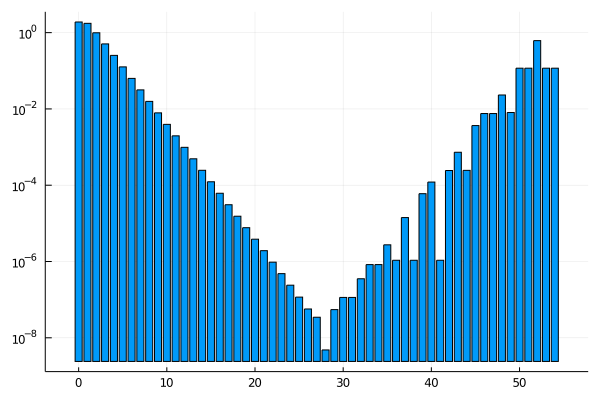

In [31]:
using Plots
xs = 0:54
ys = map(x -> abs(derivative(f,2.0^-x) - exact_df), xs)

bar(xs, ys, legend=false, yaxis=:log)

Najlepsze przybliżenie uzyskujemy dla $h=2^{-28}$. Dalsze zmniejszanie wartości $h$ powoduje ponowny wzrost błędu. Przyjrzyjmy się wartościom przyjmowanym przez $1+h$:

In [32]:
println(rpad("h", 10), rpad("1+h", 30), rpad("f(1+h)", 30), rpad("f(1+h)-f(1)", 30))
println("-"^100)
for i in 1:54
    println(rpad("2^-$i", 10), rpad(1.0+2.0^-i, 30), rpad(f(1.0+2.0^-i), 30), rpad(f(1.0+2.0^-i)-f(1.0), 30))
end

h         1+h                           f(1+h)                        f(1+h)-f(1)                   
----------------------------------------------------------------------------------------------------
2^-1      1.5                           0.7866991871732747            0.9352206989658236            
2^-2      1.25                          0.12842526201602544           0.27694677380857435           
2^-3      1.125                         -0.0706163518803512           0.07790515991219771           
2^-4      1.0625                        -0.12537150765482896          0.02315000413771995           
2^-5      1.03125                       -0.14091391571762557          0.0076075960749233396         
2^-6      1.015625                      -0.1457074873658719           0.0028140244266769976         
2^-7      1.0078125                     -0.14736142276621222          0.0011600890263366859         
2^-8      1.00390625                    -0.14800311681489065          0.0005183949776582653

Wartość funkcji $f$ w punkcie 1 wynosi natomiast

In [33]:
f(1.0)

-0.1485215117925489

Widać zatem, jak dla niewielkich wartości $h$ w liczniku wzoru na $\tilde{f}$ pojawia się odejmowanie skutkujące utratą cyfr znaczących. Można również zaobserwować, że dla $h \le 2^{-53}$ w arytmetyce Float64 mamy $1+h=1$, a więc $f(1+h)-f(1)=0$, stąd dalsze zmniejszanie $h$ nie spowoduje już zmiany w jakości przybliżenia. 

### Wnioski
Nie każdy wzór można w oczywisty sposób przekształcić do formy pozwalającej uniknąć utraty cyfr znaczących podczas odejmowania. Występujące błędy obliczeniowe zaprzeczają matematycznej intuicji, zgodnie z którą podstawianie coraz mniejszych $h$ prowadziłoby do poprawy dokładności przybliżenia.